In [1]:
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Import raw dataset

In [2]:
df = pd.read_csv('diabetic_data.csv')
df_dtype_object = pd.read_csv('diabetic_data.csv',dtype='object')

## 1.1 Visualize Raw data 

In [3]:
pd.set_option('display.max_columns', 500)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


## 1.2 List of features, Datatypes and Descriptions

In [4]:
data_dictionary = pd.read_csv('Data_dictionary.csv')
pd.set_option('display.max_colwidth', -1)
data_dictionary
##If want to display all the description
#data_dictionary[['Feature name','Type']]

,Feature name,Type,Description,Values
0,Encounter ID,Numeric,Unique identifier of an encounter,NaN
1,Patient number,Numeric,Unique identifier of a patient,NaN
2,Race,Category,Races of patient,"Caucasian, Asian, African American, Hispanic, and other"
3,Gender,Category,Gender of patient,"""male"", ""female"", and ""unknown/invalid"""
4,Age,Category,Grouped in 10-year intervals. Upper number exclusive,"[0-10), [10-20), ..., [90-100)"
5,Weight,Numeric,Weight in pounds.,NaN
6,Admission type,Category,Integer identifier corresponding to 9 distinct values.,"For example, emergency, urgent, elective, newborn, and not available"
7,Discharge disposition,Category,Integer identifier corresponding to 29 distinct values.,"For example, discharged to home, expired, and not available"
8,Admission source,Category,Integer identifier corresponding to 21 distinct values.,"For example, physician referral, emergency room, and transfer from a hospital"
9,Time in hospital,Numeric,Integer number of days between admission and discharge,NaN


## 1.3 Preliminary Analysis

### 1.4.1 Shape of the dataset

In [5]:
print ('Number of Observations: ', df.shape[0])
print ('Number of Features: ', df.shape[1])

Number of Observations:  101766
Number of Features:  50


### 1.4.2 Determine Features' Data Type

In [18]:
df_feature = pd.DataFrame(df.dtypes, columns = ['Data Types'])

### 1.4.3 Determine Missing Data point

Looking at the raw dataset, we can see that missing values are represented by "?", we want to determine the percentage of the missing observaction for each feature. That way we can see which features should be drop for this analysis. 

In [20]:
features = df.columns
df_feature['% observations presented'] = df[df_dtype_object[features] != '?'].count()/101766*100
df_feature

,Data Types,% observations presented
encounter_id,int64,100.000000
patient_nbr,int64,100.000000
race,object,97.766445
gender,object,100.000000
age,object,100.000000
weight,object,3.141521
admission_type_id,int64,100.000000
discharge_disposition_id,int64,100.000000
admission_source_id,int64,100.000000
time_in_hospital,int64,100.000000


# 2. Parsing and Cleaning

## 2.1 Parsing Features

As we can see, **"weight", "payer_code" and "medical_specialty"** is missing alot of the data. It will not be ideal to use these feature. 

**"encounter_id" and "patient_nbr"** are also not an potential predictors.

Also removing all the **24 features for medications, glucose serum test result and A1c test result**, Which we will not study for this project

In [32]:
df_parse = df[[i for i in df.columns if i not in ('weight','payer_code','medical_specialty','encounter_id','patient_nbr')]]
med_24 = df_parse.loc[:,'max_glu_serum':'metformin-pioglitazone'].columns
df_parse = df_parse.drop(med_24, axis=1)
df_parse

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,Ch,Yes,NO
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,No,Yes,>30
6,Caucasian,Male,[60-70),3,1,2,4,70,1,21,0,0,0,414,411,V45,7,Ch,Yes,NO
7,Caucasian,Male,[70-80),1,1,7,5,73,0,12,0,0,0,428,492,250,8,No,Yes,>30
8,Caucasian,Female,[80-90),2,1,4,13,68,2,28,0,0,0,398,427,38,8,Ch,Yes,NO
9,Caucasian,Female,[90-100),3,3,4,12,33,3,18,0,0,0,434,198,486,8,Ch,Yes,NO


## 2.2 Removing rows contain missing value

Currently Race and Diag have missing value. However it is ok to only have one diagnosis code. Therefore, we only eliminating row if "race" and "diag_1" is equal to "?"

In [36]:
df_clean = df_parse[df_parse.race != '?']
df_clean = df_clean[df_clean.diag_1 != '?']
df_clean.count()

race                        99474
gender                      99474
age                         99474
admission_type_id           99474
discharge_disposition_id    99474
admission_source_id         99474
time_in_hospital            99474
num_lab_procedures          99474
num_procedures              99474
num_medications             99474
number_outpatient           99474
number_emergency            99474
number_inpatient            99474
diag_1                      99474
diag_2                      99474
diag_3                      99474
number_diagnoses            99474
change                      99474
diabetesMed                 99474
readmitted                  99474
dtype: int64

## 2.3 Redefining Features

### Recategorized Diagnosis Code

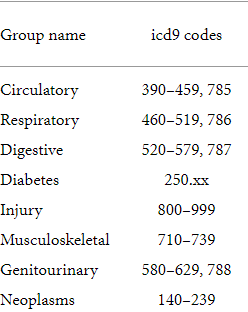

#### Some of potential predictors:

* race
* age
* weight (not enought data)
* admission_type_id
* discharge_disposition_id
* admission_source_id
* time_in_hospital
* num_lab_procedures
* num_procedures
* num_medications
* number_outpatient
* number_emergency
* number_inpatient
* diag_1
* diag_2
* diag_3
* number_diagnoses
* insulin
* diabetesMed

#### Outcome:
* readmitted

#### ID Mappings:
admission_type_id|	description|
---|---|
1 |Emergency
2 |Urgent
3 |Elective
4 |Newborn
5 |Not Available
6 |NULL
7 |Trauma Center
8 |Not Mapped

discharge_disposition_id|	description|
---|---
1|	Discharged to home
2|	Discharged/transferred to another short term hospital
3|	Discharged/transferred to SNF
4|	Discharged/transferred to ICF
5|	Discharged/transferred to another type of inpatient care institution
6|	Discharged/transferred to home with home health service
7|	Left AMA
8|	Discharged/transferred to home under care of Home IV provider
9|	Admitted as an inpatient to this hospital
10|	Neonate discharged to another hospital for neonatal aftercare
11|	Expired
12|	Still patient or expected to return for outpatient services
13|	Hospice / home
14|	Hospice / medical facility
15|	Discharged/transferred within this institution to Medicare approved swing bed
16|	Discharged/transferred/referred another institution for outpatient services
17|	Discharged/transferred/referred to this institution for outpatient services
18|	NULL
19|	Expired at home. Medicaid only, hospice.
20|	Expired in a medical facility. Medicaid only, hospice.
21|	Expired, place unknown. Medicaid only, hospice.
22|	Discharged/transferred to another rehab fac including rehab units of a hospital .
23|	Discharged/transferred to a long term care hospital.
24|	Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.
25|	Not Mapped
26|	Unknown/Invalid
30|	Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere
27|	Discharged/transferred to a federal health care facility.
28|	Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital
29|	Discharged/transferred to a Critical Access Hospital (CAH).


admission_source_id|	description
---|---
1|	 Physician Referral
2|	Clinic Referral
3|	HMO Referral
4|	Transfer from a hospital
5|	 Transfer from a Skilled Nursing Facility (SNF)
6|	 Transfer from another health care facility
7|	 Emergency Room
8|	 Court/Law Enforcement
9|	 Not Available
10|	 Transfer from critial access hospital
11|	Normal Delivery
12|	 Premature Delivery
13|	 Sick Baby
14|	 Extramural Birth
15|	Not Available
17|	NULL
18|	 Transfer From Another Home Health Agency
19|	Readmission to Same Home Health Agency
20|	 Not Mapped
21|	Unknown/Invalid
22|	 Transfer from hospital inpt/same fac reslt in a sep claim
23|	 Born inside this hospital
24|	 Born outside this hospital
25|	 Transfer from Ambulatory Surgery Center
26|	Transfer from Hospice
